In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

# 获取数据

In [2]:
file_data= pd.read_csv("./data/链家北京租房数据.csv")
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [3]:
file_data.shape

(8223, 5)

In [4]:
file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   区域       8223 non-null   object
 1   小区名称     8223 non-null   object
 2   户型       8223 non-null   object
 3   面积(㎡)    8223 non-null   object
 4   价格(元/月)  8223 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [5]:
file_data.describe()

,价格(元/月)
count,8223.000000
mean,9512.297823
std,9186.752612
min,566.000000
25%,4800.000000
50%,6800.000000
75%,10000.000000
max,150000.000000


# 数据基本处理

## 重复值和空值处理

#### 思考：怎么处理缺失值

In [6]:
#重复值
# file_data.duplicated()
file_data.drop_duplicates()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [7]:
file_data.shape

(8223, 5)

In [8]:
file_data.dropna()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


## 数据转换类型

### 面积数据类型转换

In [9]:
file_data.head()

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500


In [10]:
float(file_data["面积(㎡)"].values[0][:-2])
float(file_data["面积(㎡)"].values[1][:-2])
float(file_data["面积(㎡)"].values[2][:-2])
float(file_data["面积(㎡)"].values[8222][:-2])

35.43

In [11]:
# list.append()
data_area=file_data["面积(㎡)"].values
data_new= np.array([])
for i in data_area:
#     print(i)
    data_new=np.append(data_new,i[:-2])

In [12]:
# list.append()

# float(data_new)
data_new=data_new.astype(np.float64)
data_new

array([59.11, 56.92, 40.57, ..., 92.41, 71.81, 35.43])

In [13]:
file_data["面积(㎡)"]=data_new
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4房间2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


### 户型表达方式替换

In [14]:
house_data=file_data["户型"]

house_list=[]

for i in house_data:
    new=i.replace("房间","室")
    house_list.append(new)

In [15]:
# # house_list
file_data["户型"]=house_list
# #file_data
# data_house=file_data["户型"].values
# data_new1= np.array([])
# for i in data_house:
# #     print(i)
#     data_new1=np.append(data_new1,i[::2])
# data_new1=data_new1.astype(np.int32)
# data_new1
# #file_data["户型"]=data_new1
file_data

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


# 图表分析

## 房源数量、位置分布分析

In [16]:
# file_data['区域'].unique()

new_df = pd.DataFrame({'区域':file_data['区域'].unique(),'数量':[0]*13})
new_df

,区域,数量
0,东城,0
1,丰台,0
2,亦庄开发区,0
3,大兴,0
4,房山,0
5,昌平,0
6,朝阳,0
7,海淀,0
8,石景山,0
9,西城,0


In [17]:
groupy_area = file_data.groupby(by='区域').count()
groupy_area.values
new_df['数量'] = groupy_area.values

new_df

new_df.sort_values(by=['数量'], ascending=False)

,区域,数量
6,朝阳,2360
1,丰台,855
7,海淀,780
10,通州,676
9,西城,604
3,大兴,518
5,昌平,503
12,顺义,419
0,东城,412
11,门头沟,392


## 户型数量分析

In [18]:
# 定义函数，用于计算各户型的数量
def all_house(arr):
    key = np.unique(arr)
#     print(key)
    result = {}
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
    return result

# 获取户型数据
house_array = file_data['户型']
house_info = all_house(house_array)
# house_info

# for key, value in house_info.items():
#     if  house_info.items().value > 50:
#         dict(key, value)

In [19]:
# 使用字典推导式
house_type = dict((key, value) for key, value in house_info.items() if value > 50)
show_houses = pd.DataFrame({'户型':[x for x in  house_type.keys()],
                  '数量':[x for x in house_type.values()]})
show_houses

,户型,数量
0,1室0厅,365
1,1室1卫,177
2,1室1厅,1239
3,2室1卫,167
4,2室1厅,3207
5,2室2厅,376
6,3室1卫,129
7,3室1厅,1077
8,3室2卫,69
9,3室2厅,699


In [20]:
for i in range(13):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12


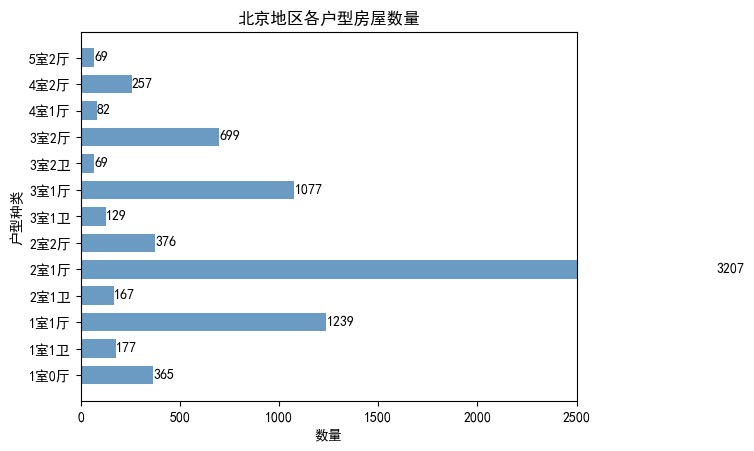

In [21]:
import matplotlib.pyplot as plt

house_type = show_houses['户型']
house_type_num = show_houses['数量']

plt.barh(range(13), house_type_num, height=0.7, color='steelblue', alpha=0.8)  

plt.yticks(range(13), house_type)
plt.xlim(0,2500)  # 把x轴坐标延长到2500
plt.xlabel("数量")
plt.ylabel("户型种类")
plt.title("北京地区各户型房屋数量")


for x, y in enumerate(house_type_num):
    plt.text(y + 0.2, x - 0.1, '%s' % y)
    
plt.show()

## 平均租金分析

In [22]:
df_all = pd.DataFrame({'区域':file_data['区域'].unique(),
                         '房租总金额':[0]*13,
                         '总面积(㎡)':[0]*13})
df_all

,区域,房租总金额,总面积(㎡)
0,东城,0,0
1,丰台,0,0
2,亦庄开发区,0,0
3,大兴,0,0
4,房山,0,0
5,昌平,0,0
6,朝阳,0,0
7,海淀,0,0
8,石景山,0,0
9,西城,0,0


In [23]:
# 求总金额和总面积

sum_price = file_data['价格(元/月)'].groupby(file_data['区域']).sum()  
sum_area = file_data['面积(㎡)'].groupby(file_data['区域']).sum()
df_all['房租总金额'] = sum_price.values
df_all['总面积(㎡)'] = sum_area.values

df_all

df_all['每平米租金(元)'] = round(df_all['房租总金额'] / df_all ['总面积(㎡)'], 2)
df_all

df_merge = pd.merge(new_df, df_all)

df_merge

,区域,数量,房租总金额,总面积(㎡),每平米租金(元)
0,东城,412,5696050,38985.01,146.11
1,丰台,855,6321893,74376.56,85.00
2,亦庄开发区,213,1868700,22927.33,81.51
3,大兴,518,3277650,50877.71,64.42
4,房山,246,993450,21130.87,47.01
5,昌平,503,3551481,50505.07,70.32
6,朝阳,2360,29536176,244750.02,120.68
7,海淀,780,8981550,72103.56,124.56
8,石景山,245,1609750,19553.02,82.33
9,西城,604,7990475,51700.08,154.55


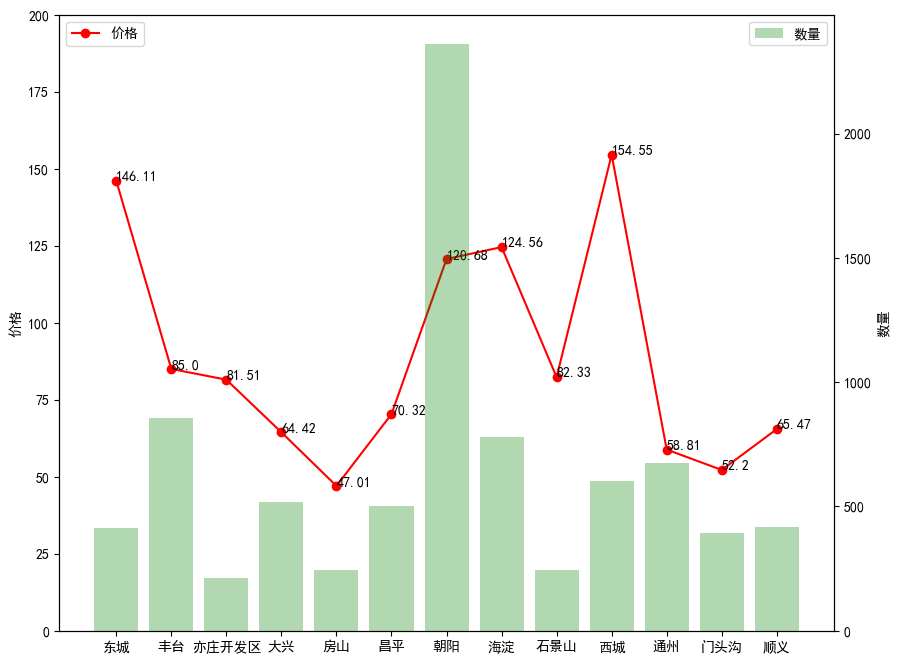

In [24]:
num= df_merge['数量']   # 数量
price=df_merge['每平米租金(元)'] # 价格
l=[i for i in range(13)]

lx=df_merge['区域']
fig = plt.figure(figsize=(10, 8), dpi=100)

# 显示折线图
ax1 = fig.add_subplot(111) 
ax1.plot(l, price,'or-',label='价格')  # "or-" 显示那个小红圆点
for i,(_x,_y) in enumerate(zip(l,price)):
    plt.text(_x,_y,price[i])  
ax1.set_ylim([0, 200])
ax1.set_ylabel('价格')
plt.legend(loc='upper left') 

# 显示条形图
ax2 = ax1.twinx()  # 显示次坐标轴ax2=ax1.twinx()
plt.bar(l,num,alpha=0.3,color='green',label='数量')
ax2.set_ylabel('数量')
plt.legend(loc="upper right")
plt.xticks(l,lx)

plt.show()

## 面积基本分析

In [25]:
# 查看房屋的最大面积和最小面积
print('房屋最大面积是%d平米'%(file_data['面积(㎡)'].max()))
print('房屋最小面积是%d平米'%(file_data['面积(㎡)'].min()))

# 查看房租的最高值和最小值
print('房租最高价格为每月%d元'%(file_data['价格(元/月)'].max()))
print('房屋最低价格为每月%d元'%(file_data['价格(元/月)'].min()))

房屋最大面积是1133平米
房屋最小面积是11平米
房租最高价格为每月150000元
房屋最低价格为每月566元


In [26]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 1200]
area_cut = pd.cut(list(file_data['面积(㎡)']), area_divide)
area_cut_data = area_cut.describe()

area_cut_data

,counts,freqs
categories,,
"(1, 30]",68,0.008269
"(30, 50]",1025,0.124650
"(50, 70]",2259,0.274717
"(70, 90]",1558,0.189469
"(90, 120]",1523,0.185212
"(120, 140]",557,0.067737
"(140, 160]",378,0.045969
"(160, 1200]",855,0.103977


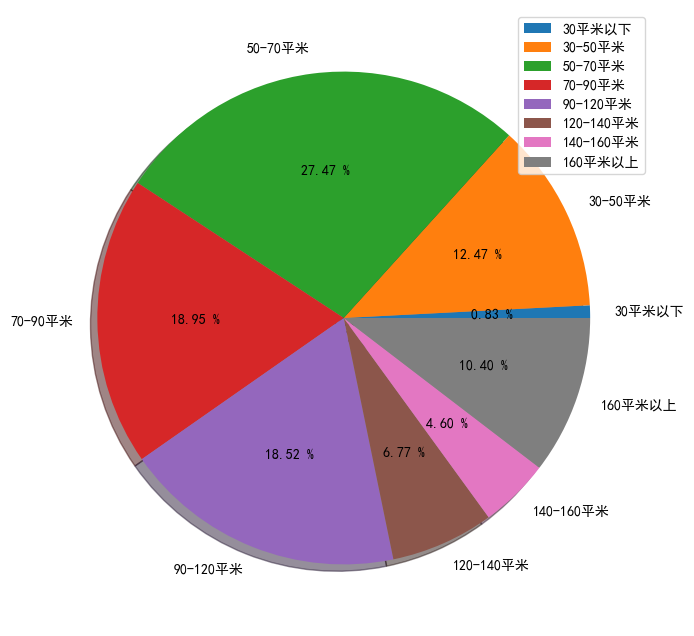

In [27]:
area_percentage = (area_cut_data['freqs'].values)*100

labels  = ['30平米以下', '30-50平米', '50-70平米', '70-90平米',
'90-120平米','120-140平米','140-160平米','160平米以上']

plt.figure(figsize=(20, 8), dpi=100)
plt.axes(aspect=1)  # 显示的是圆形,如果不加,是椭圆形
plt.pie(x=area_percentage, labels=labels, autopct='%.2f %%', shadow=True)
plt.legend(loc='upper right')
plt.show()